In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Supriya Nagraj\Desktop\jupyterprojectspy\file.csv")

In [3]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [5]:
df.isnull()

,Date,State,Region,Confirmed,Deaths,Recovered
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
316,False,False,False,False,False,False
317,False,False,False,False,False,False
318,False,False,False,False,False,False
319,False,False,False,False,False,False


In [6]:
df = df.dropna()

In [7]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
183,4/29/2020,Alberta,Canada,5165,87,0
184,4/29/2020,Anguilla,UK,3,0,3
185,4/29/2020,Anhui,Mainland China,991,6,985
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [9]:
# Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.
df.groupby('Region')[['Confirmed', 'Recovered', 'Deaths']].sum()

,Confirmed,Recovered,Deaths
Region,,,
Australia,6752,5715,91
Canada,52865,20327,3155
Denmark,198,192,0
France,1450,890,34
Hong Kong,1037,830,4
Macau,45,34,0
Mainland China,82862,77610,4633
Netherlands,196,119,16
UK,1220,857,69


In [10]:
# Q. 2) Sort records of all Regions in descending order according to the Confirmed cases.
df.groupby('Region')[['Confirmed']].sum().sort_values(by= ['Confirmed'] ,ascending = False)

,Confirmed
Region,
US,1039909
Mainland China,82862
Canada,52865
Australia,6752
France,1450
UK,1220
Hong Kong,1037
Denmark,198
Netherlands,196


In [11]:
# Q. 4) In which Region, minimum number of Deaths cases were recorded ?
df.groupby('Region')[['Deaths']].sum().sort_values(by = ['Deaths'])

,Deaths
Region,
Denmark,0
Macau,0
Hong Kong,4
Netherlands,16
France,34
UK,69
Australia,91
Canada,3155
Mainland China,4633


In [12]:
# Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?
df[df.Region==('France')][['Confirmed','Deaths','Recovered','Date']]

,Confirmed,Deaths,Recovered,Date
209,125,1,93,4/29/2020
210,58,0,50,4/29/2020
218,149,12,82,4/29/2020
247,175,14,83,4/29/2020
250,460,4,235,4/29/2020
260,18,0,17,4/29/2020
286,420,0,300,4/29/2020
288,6,0,6,4/29/2020
289,1,0,0,4/29/2020
300,38,3,24,4/29/2020


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Which countries had the highest peak in daily new cases? 
df = df.copy() 
totals = df.groupby('Region')[['Confirmed', 'Deaths']].sum()

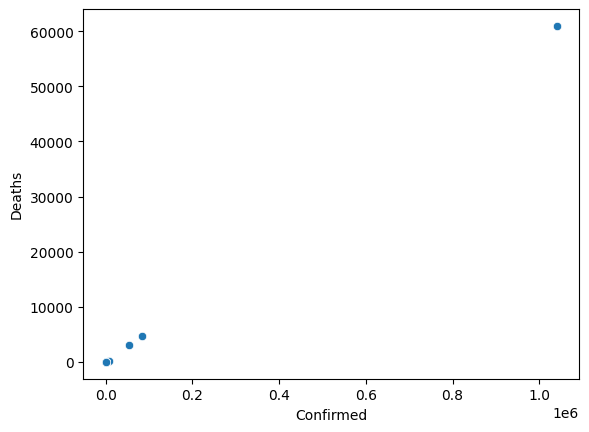

In [18]:
sns.scatterplot(data = totals, x= 'Confirmed', y = 'Deaths')
plt.show()

<Axes: ylabel='Region'>

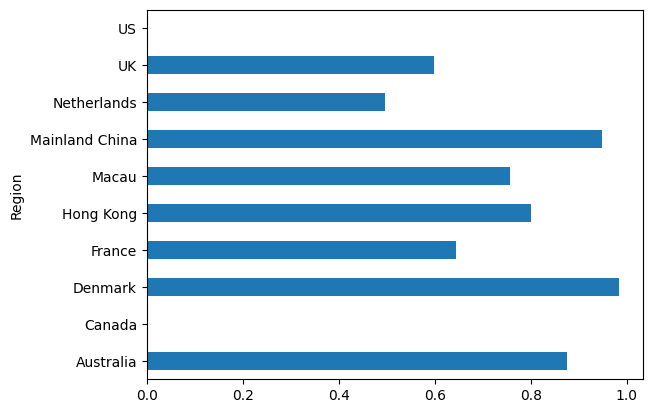

In [19]:
# What is the recovery rate by country?
df['RecoveryRate'] = df['Recovered'] / df['Confirmed']
recovery_rate = df.groupby('Region')['RecoveryRate'].mean()
recovery_rate.head(10).plot(kind='barh')